# Example: model with inputs and outputs

In this session, we illustrate how to create an instance of existing thermal model, how to set model inputs, how to execute it and how to get results from it.
This example illustrates the basic model steering and also use of data types (properties and fields).

This example can be followed by entering interactive python prompt or preparing python script and running it by python.
Here we use Jupyter notebook environment.
First step is to import MuPIF module and models module with demo models

In [1]:
# set up python module path to mupif
import sys
sys.path.append('../../../mupif')

import mupif as mp
from mupif.demo import models

The simulation workflows are composed of individual models. Model in MuPIF is represented as a object derived from *Model* class. The model comes with metadata, that provide useful information about model itself.
The *Model* class defines common methods provided by all models. These methods include:
- *set* method to map input parameters to model
- *solveStep* method to update model
- *get* method to request model output parameters
- *getApplicationSignature* to return model info string (signature)
- *getMetadata* to return model metadata.
Now, let us start to create in instance of thermal model (*ThermalModel* class). 

We will use these models in this example. The demo thermal model solves stationary thermal conduction problem on a rectangular domain. It assumes fixed geometry, but allows to control boundary conditions on its edges.

In [2]:
# create instance of thermal model
tm = models.ThermalModel()
tm.getApplicationSignature()

'Stationary thermal-demo-solver, ver 1.0'

Lets initialize model and get model metadata describing its inputs

In [3]:
tm.initialize(validateMetaData=False)
tm.getMetadata('Inputs')

[{'Name': 'edge temperature',
  'Type': 'mupif.Property',
  'Required': False,
  'Type_ID': 'mupif.DataID.PID_Temperature',
  'Units': 'deg_C',
  'Obj_ID': ['Cauchy top',
   'Cauchy bottom',
   'Cauchy left',
   'Cauchy right',
   'Dirichlet top',
   'Dirichlet bottom',
   'Dirichlet left',
   'Dirichlet right'],
  'Set_at': 'timestep',
  'ValueType': 'Scalar'},
 {'Name': 'Input file',
  'Type': 'mupif.PyroFile',
  'Required': True,
  'Type_ID': 'mupif.DataID.ID_InputFile',
  'Obj_ID': 'input_file_thermal',
  'Set_at': 'initialization',
  'Units': ''}]

We see that we can set edge boundary conditions by passing in (via *set* method) a property with object id determining (1) the edge position (top, left, etc) and (2) type of boundary condition (Dirichlet, Cauchy).
If no boundary condition is applied on specific edge, a perfect insulation is assumed.

Let's prescribe temperature on top and bottom edges:
- first create a property (as an instance of ConstantProperty dataType) with physical meaning of Temperature (*propID=mp.DataID.PID_Temperature*), being a scalar quantity (*valueType=mp.ValueType.Scalar*) of value 50 (*value=(50,)* and units of Kelvin (*unit=mp.U['K']*)). 
- apply this value as a Dirichlet boundary condition on top edge:

In [4]:
# boundary condition for top edge
bc1 = mp.ConstantProperty(propID=mp.DataID.PID_Temperature, valueType=mp.ValueType.Scalar, value=(50,), unit=mp.U['deg_C'])
tm.set(bc1, 'Dirichlet top')

# boundary condition for bottom edge
bc2 = mp.ConstantProperty(propID=mp.DataID.PID_Temperature, valueType=mp.ValueType.Scalar, value=(20,), unit=mp.U['deg_C'])
tm.set(bc2, 'Dirichlet bottom')


Now we can update the model (solve the thermal conduction problem):

In [5]:
# solve 
tm.solveStep(mp.TimeStep(time=0,dt=.1,targetTime=1.,unit=mp.U.s))

Finally, we request a thermal field from a model (ft1 is a MuPIF dataType of type Field, representing a field variable). Fields can be evaluated at specific point, exported or plotted.

100%|███████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:00<00:00, 16268.03 cells/s]

[20.] C


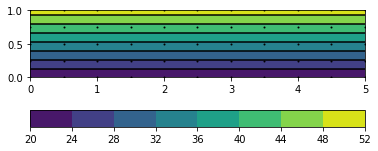

In [6]:
# show the field
ft1=tm.get(mp.DataID.FID_Temperature,time=1.*mp.Q.s)
ft1.plot2D()
print(ft1.evaluate((5,0,0)))